# Sorghum Cultivar Identification
## Analyze Validation Accuracy During Neural Network Training
* Veronica Thompson
* Colorado State University Global
* CSC 581: Capstone
* Dr. Orenthio Goodwin
* 5/8/2022

This notebook is used to evaluate performance of image classification neural networks on on Sorghum-100 dataset. Graphs are created to visualize training and validation accuracy obtained during neural network training.

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
path = 'training histories'

In [3]:
def single_plot(files, title):
    fig = plt.figure()
    for file, label in files.items():
        df = pd.read_csv(os.path.join(path, file))
        plt.plot(df['val_accuracy'] * 100, label=label)
        fig.suptitle(title, fontsize = 16)
        plt.xlabel('Training Epochs')
        plt.ylabel('% Accuracy')
        plt.legend()

In [4]:
def side_by_side_plots(files, title):
    fig, axes = plt.subplots(1,2)
    fig.tight_layout(rect=[0, 0.03, 1, 0.90])
    for ax, (file, label) in zip(fig.axes, files.items()):
        df = pd.read_csv(os.path.join(path, file))
        ax.plot(df['accuracy'] * 100, label='Training Accuracy')
        ax.plot(df['val_accuracy'] * 100, label='Validation Accuracy')
        ax.set_title(label)
        ax.set_xlabel('Training Epochs')
        ax.set_ylabel('% Accuracy')
        ax.set_ylim(0, 100)
        ax.legend()
    fig.suptitle(title, fontsize = 16)

In [5]:
def train_vs_valid_plot(file, title):
    df = pd.read_csv(os.path.join(path,file))
    fig = plt.figure()
    plt.plot(df['accuracy'] * 100, label='Training Accuracy')
    plt.plot(df['val_accuracy'] * 100, label='Validation Accuracy')
    fig.suptitle(title, fontsize = 16)
    plt.xlabel('Training Epochs')
    plt.ylabel('% Accuracy')
    plt.legend()

### Baseline model
The baseline model was trained several times. Validation accuracy after 8 epochs is between .04 and .06 for all trials. The mean accuracy over the five trials was selected as the baseline accuracy. Baseline model included one block of VGG inspired convolution layers and a fully-connect classification layer. The baseline model was trained on images of 128x128 pixels.

In [6]:
files = {'history 1 layer 128x128.csv': 'run 1',
         'history 1 layer 128x128 run2.csv': 'run 2',
         'history 1 layer 128x128 run3.csv': 'run 3',
         'history 1 layer 128x128 run4.csv': 'run 4',
         'history 1 layer 128x128 run5.csv': 'run 5',
        }

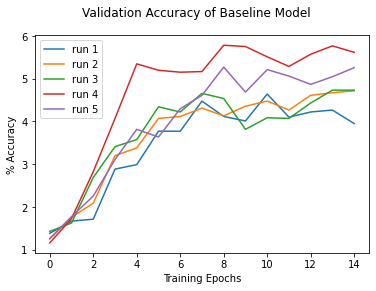

In [7]:
fig = plt.figure()
accuracies = []
for file, label in files.items():
    df = pd.read_csv(os.path.join(path, file))
    plt.plot(df['val_accuracy'] * 100, label=label)
    fig.suptitle('Validation Accuracy of Baseline Model')
    plt.xlabel('Training Epochs')
    plt.ylabel('% Accuracy')
    plt.legend()
    accuracies += [df['val_accuracy'].iloc[-1]]

In [8]:
baseline_mean_accuracy = sum(accuracies) / len(accuracies)
print('Baseline validation accuracy:', baseline_mean_accuracy)

Baseline validation accuracy: 0.048543106019496865


### Data augmentation
Several methods of data augmentation were examined. Horizontal and vertical shifts of up to 10% and horizontal and vertical shifts showed the most promise. This was the data augmentation used on all candidate models.

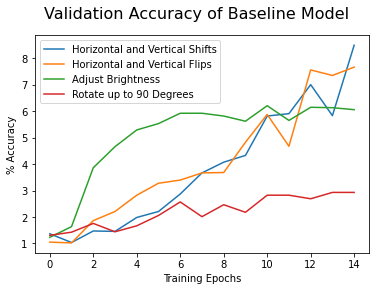

In [9]:
files = {'history 1 layer 128x128 shift 10pct.csv': 'Horizontal and Vertical Shifts',
         'history 1 layer 128x128 both flips.csv': 'Horizontal and Vertical Flips',
         'history 1 layer 128x128 brightness 50pct.csv': 'Adjust Brightness',
         'history 1 layer 128x128 rotate90.csv': 'Rotate up to 90 Degrees'
        }
single_plot(files, 'Validation Accuracy of Baseline Model')

### Reduction in Overfitting
The addition of data augmentation reduced overfitting in baseline model. Validation accuracy was increased.

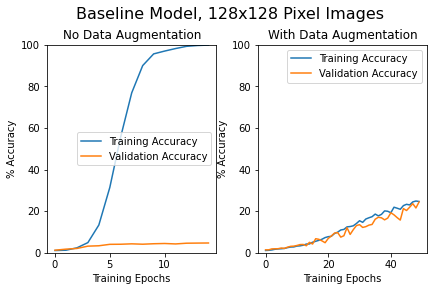

In [10]:
files = {'history 1 layer 128x128 run2.csv': 'No Data Augmentation',
         'history 1 layer 128x128 shift_both_flips.csv': 'With Data Augmentation'
        }    
side_by_side_plots(files, 'Baseline Model, 128x128 Pixel Images')

### Increased Image Size
Increasing training images from 128x128 pixels to 224x224 pixels resulted in increased validation accuracy.

In [11]:
files = ['one_layer_shiftflip_ep1-50_history.csv',
         'one_layer_shiftflip_ep51-70_history.csv',
         'one_layer_shiftflip_ep71-80_history.csv']
dfs = [pd.read_csv(os.path.join(path, file)) for file in files]
df = pd.concat(dfs)
df.to_csv(os.path.join(path, 'one_layer_224x224_shift_flip.csv'))

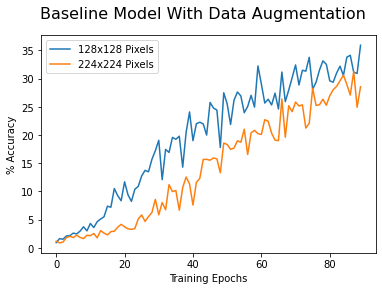

In [12]:
files = {'layers1_shiftflip_128x128_ep1-90_history.csv': '128x128 Pixels',
         'one_layer_224x224_shift_flip.csv': '224x224 Pixels'
        }    
single_plot(files, 'Baseline Model With Data Augmentation')

### Three Block Model
The model with three VGG-inspired blocks also benefitted from data augmentation and larger training images.

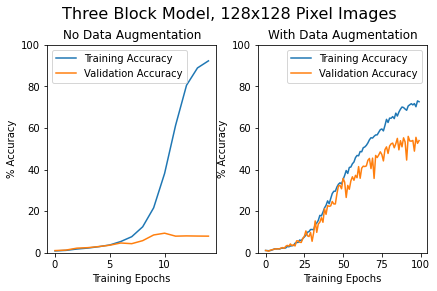

In [13]:
files = {'history 3 layers 128x128.csv': 'No Data Augmentation',
         'history 3 layer 128x128 shift_both_flips run2.csv': 'With Data Augmentation'
        }
side_by_side_plots(files, 'Three Block Model, 128x128 Pixel Images')

In [14]:
files = ['layers3_shiftflip_ep1-40_history.csv',
         'layers3_shiftflip_ep41-80_history.csv',
         'layers3_shiftflip_ep81-100_history.csv']
dfs = [pd.read_csv(os.path.join(path, file)) for file in files]
df = pd.concat(dfs)
df.to_csv(os.path.join(path, 'three_block_224x224_shift_flip.csv'))

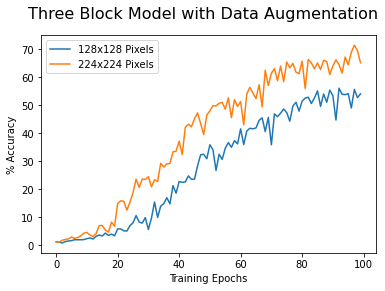

In [15]:
files = {'history 3 layer 128x128 shift_both_flips run2.csv': '128x128 Pixels',
         'three_block_224x224_shift_flip.csv': '224x224 Pixels'
        }    
single_plot(files, 'Three Block Model with Data Augmentation')

### Transfer Learning Using VGG16 Model
The pretrained VGG16 model also benefitted from larger training images. Data augmentation was not tested with this model.

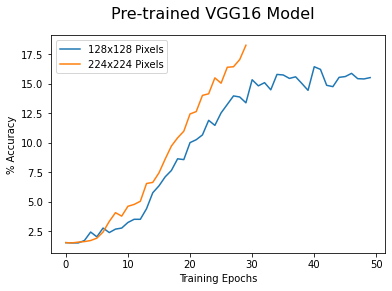

In [16]:
files = {'history vgg16 128x128.csv': '128x128 Pixels',
         'history vgg16 224x224 run2.csv': '224x224 Pixels'
        }
single_plot(files, "Pre-trained VGG16 Model")

### Transfer Learning Using ResNet50
The ResNet50 model was the most successful of the models which were trained without data augmentation. Despite evidence of overfitting during training, the addition of data augmentation and a much longer training period did little to increase accuracy.

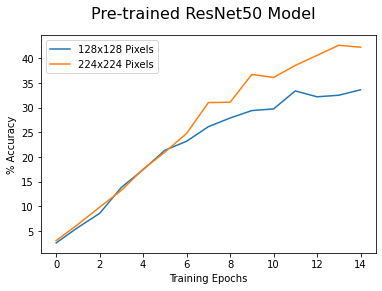

In [17]:
files = {'history resnet50 128x128 run2.csv': '128x128 Pixels',
         'history resnet50 224x224.csv': '224x224 Pixels'
        }
single_plot(files, "Pre-trained ResNet50 Model")

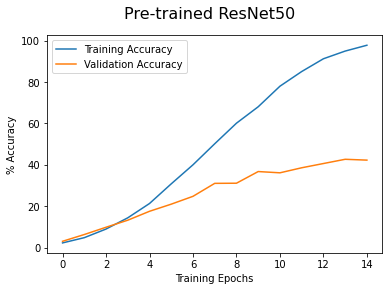

In [18]:
file = 'history resnet50 224x224.csv'
train_vs_valid_plot(file, 'Pre-trained ResNet50')

In [19]:
files = ['resnet50_shiftflip_ep1-20_history.csv',
         'resnet50_shiftflip_ep21-40_history.csv',
         'resnet50_shiftflip_ep41-50_history.csv',
         'resnet50_shiftflip_ep51-60_history.csv',
         'resnet50_shiftflip_ep61-70_history.csv',
         'resnet50_shiftflip_ep71-80_history.csv',
         'resnet50_shiftflip_ep81-90_history.csv',
         'resnet50_shiftflip_ep91-110_history.csv',
         'resnet50_shiftflip_ep111-130_history.csv',
         'resnet50_shiftflip_ep131-140_history.csv']
dfs = [pd.read_csv(os.path.join(path, file)) for file in files]
df = pd.concat(dfs)
df.to_csv(os.path.join(path, 'resnet50_shift_flip.csv'))

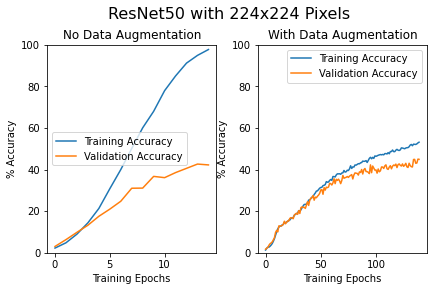

In [20]:
files = {'history resnet50 224x224.csv': 'No Data Augmentation',
         'resnet50_shift_flip.csv': 'With Data Augmentation'
        }
side_by_side_plots(files, 'ResNet50 with 224x224 Pixels')